# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [91]:
import numpy as np

#%matplotlib notebook
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [65]:
# I define the different alpha nad sigma values i want to solve the model at.
a_variations = [0.25, 0.5, 0.75]
s_variations = [0.5, 1, 1.5]

# I create an empty array to be filled with value of alpha and sigma and the corresponding HF/HM value.
cordinates = np.zeros(shape=(9,3))
alpha_cor = []
sigma_cor = []
hf_hm_cor = []
# A count variable
j = 0

# For every combination of the sigma and alpha values i solve the model using the built in model class functions.
for a in a_variations:
        for s in s_variations:
                model = inauguralproject.HouseholdSpecializationModelClass(a,s)
                optimum = model.solve_discrete()
                optimum.utility = model.calc_utility(optimum.LM, optimum.HM, optimum.LF, optimum.HF)
                cordinates[j]   = [a, s, optimum.HF/optimum.HM]
                alpha_cor.append(a)
                sigma_cor.append(s)
                hf_hm_cor.append(optimum.HF/optimum.HM)
                j = j +1



c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


At the alpha value of: 0.2, and the sigma value of: 0.5, the female to male home work ratio is: 1.000
At the alpha value of: 0.2, and the sigma value of: 1.0, the female to male home work ratio is: 0.308
At the alpha value of: 0.2, and the sigma value of: 1.5, the female to male home work ratio is: 1.048
At the alpha value of: 0.5, and the sigma value of: 0.5, the female to male home work ratio is: 1.125
At the alpha value of: 0.5, and the sigma value of: 1.0, the female to male home work ratio is: 1.000
At the alpha value of: 0.5, and the sigma value of: 1.5, the female to male home work ratio is: 1.000
At the alpha value of: 0.8, and the sigma value of: 0.5, the female to male home work ratio is: 1.000
At the alpha value of: 0.8, and the sigma value of: 1.0, the female to male home work ratio is: 3.250
At the alpha value of: 0.8, and the sigma value of: 1.5, the female to male home work ratio is: 1.048


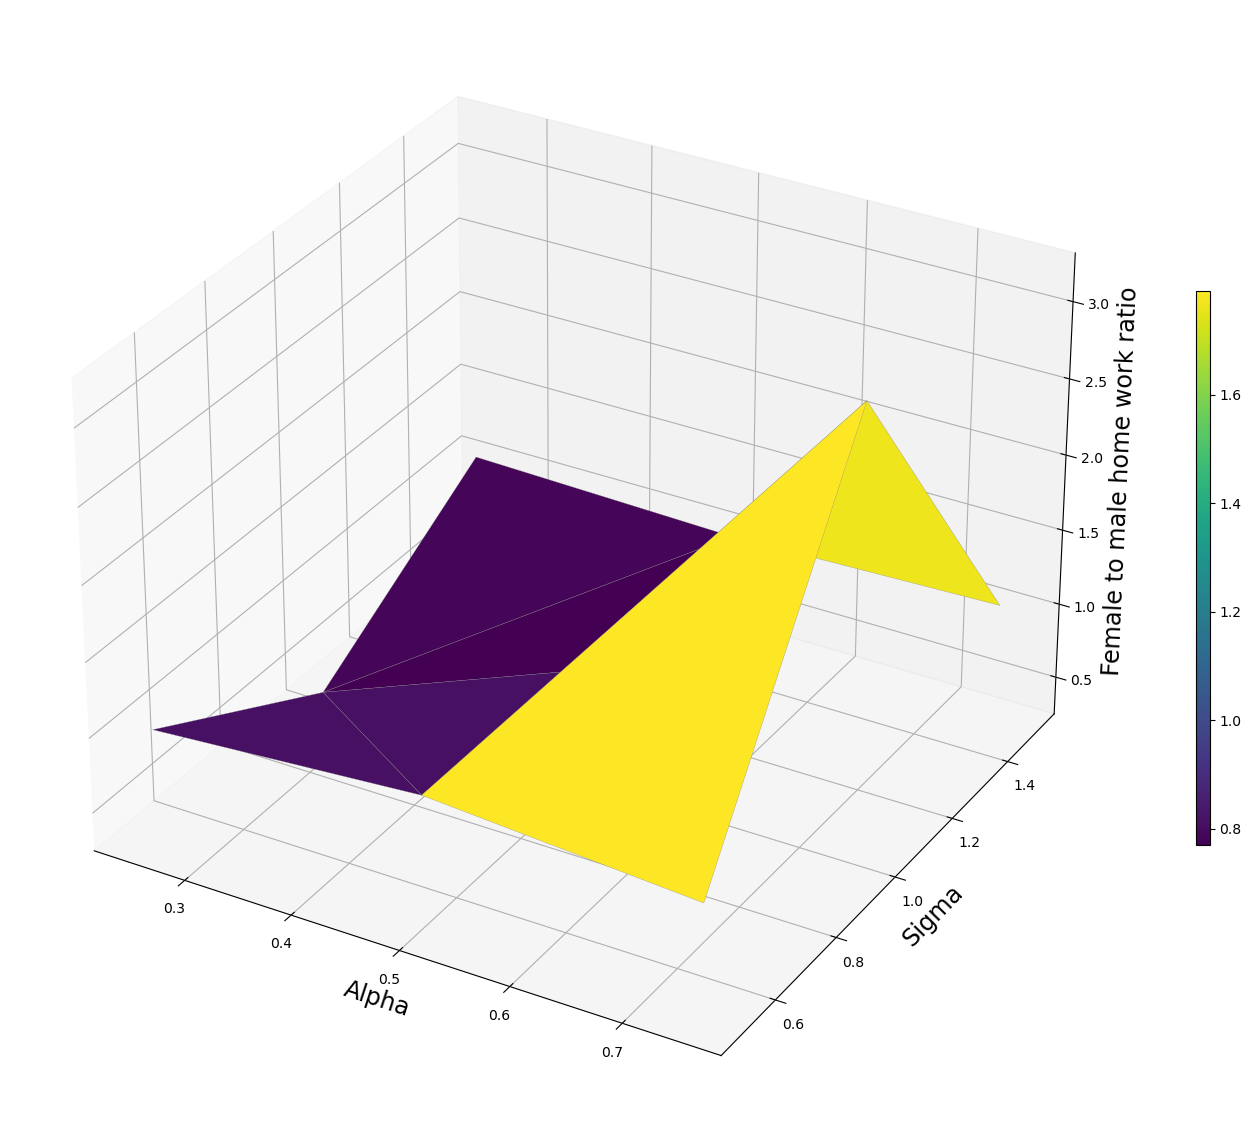

In [66]:
# The results in words, using the cordinates array.
for i in range(0, 9):
        print(f'At the alpha value of: {cordinates[i,0]:<.1f}, and the sigma value of: {cordinates[i,1]:<.1f}, the female to male home work ratio is: {cordinates[i,2]:<1.3f}')

# The results illustrated in a figure, using the three cordinate lists
fig=plt.figure(figsize =(18, 18))
ax=fig.add_subplot(111, projection='3d')

#scatter plot
#ax.scatter(alpha_cor, sigma_cor, hf_hm_cor, alpha=1)

# boxplot
#bottom = np.zeros_like(hf_hm_cor)
#width = depth = 1
#ax.bar3d(alpha_cor, sigma_cor, bottom, width, depth, hf_hm_cor, shade=True)

#surface plot
# Creating color map
my_cmap = plt.get_cmap()
trisurf = ax.plot_trisurf(alpha_cor, sigma_cor, hf_hm_cor,
                 cmap=my_cmap, linewidth=0.2, antialiased=True, edgecolor = 'grey')
fig.colorbar(trisurf, ax = ax, shrink = 0.4, aspect = 40)

ax.set_xlabel('Alpha', size='xx-large')
ax.set_ylabel('Sigma', size='xx-large')
ax.set_zlabel('Female to male home work ratio', size='xx-large')
plt.show(block=False)

c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:64: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:64: RuntimeWarning: invalid value encountered in multiply
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:67: RuntimeWarning: invalid value encountered in multiply
  Q = C**par.omega*H**(1-par.omega)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_9348\752532595.py:15: RuntimeWarning: invalid value encountered in double_scalars
  hf_hm_cor.append(optimum.HF/optimum.HM)


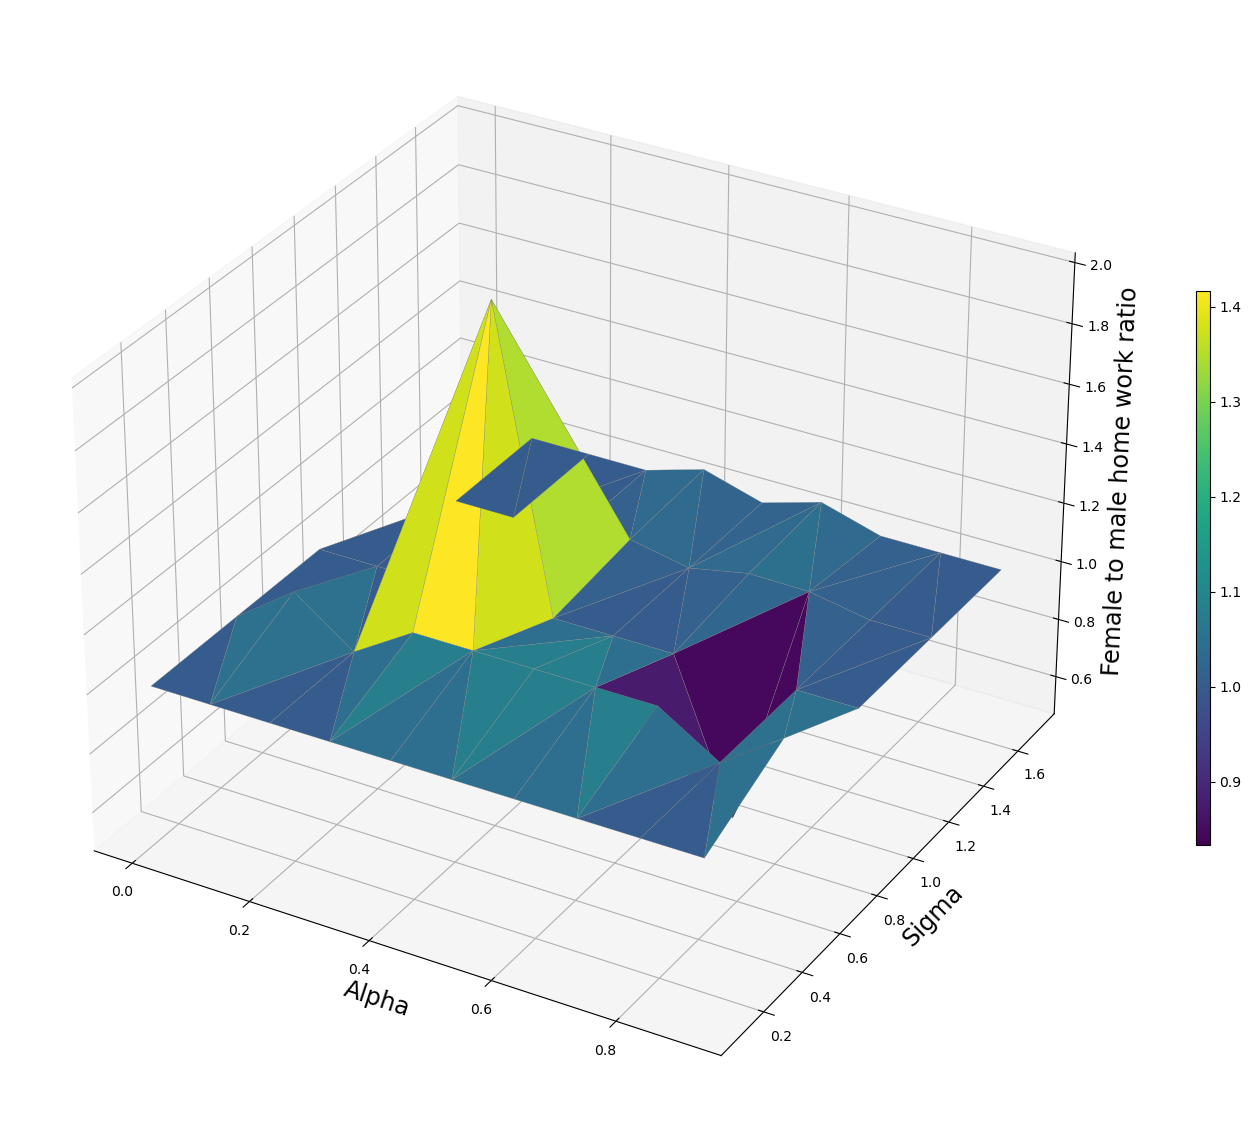

In [62]:
# I define the different alpha nad sigma values i want to solve the model at.
a_variations = np.arange(0,1,0.1).tolist()
s_variations = np.arange(0.1,2,0.4).tolist()
alpha_cor = []
sigma_cor = []
hf_hm_cor = []

# For every combination of the sigma and alpha values i solve the model using the built in model class functions.
for a in a_variations:
        for s in s_variations:
                model = inauguralproject.HouseholdSpecializationModelClass(a,s)
                optimum = model.solve_discrete()
                alpha_cor.append(a)
                sigma_cor.append(s)
                hf_hm_cor.append(optimum.HF/optimum.HM)


fig=plt.figure(figsize =(18, 18))
ax=fig.add_subplot(111, projection='3d')
my_cmap = plt.get_cmap()
trisurf = ax.plot_trisurf(alpha_cor, sigma_cor, hf_hm_cor,
                 cmap=my_cmap, linewidth=0.2, antialiased=True, edgecolor = 'grey')
fig.colorbar(trisurf, ax = ax, shrink = 0.4, aspect = 40)

ax.set_xlabel('Alpha', size='xx-large')
ax.set_ylabel('Sigma', size='xx-large')
ax.set_zlabel('Female to male home work ratio', size='xx-large')
plt.show(block=False)

# Question 2

In [115]:
# I define the different female wages i want to solve the model at.
wf_variations = [0.8,0.9,1.0,1.1,1.2]

# I create an empty array to be filled with value of the log of the female to male wage ratio and the corresponding log of female to male home work.
cordinates = np.zeros(shape=(5,2))
# a list for each of the variables i want to plot.
l_wf_wm_cor = []
l_hf_hm_cor = []
# A count variable, j, used for indexing in the array.
j = 0

# For every wage i solve the model using the built in model class functions.
for wf in wf_variations:
        model = inauguralproject.HouseholdSpecializationModelClass(wF=wf)
        optimum = model.solve_discrete()
        optimum.utility = model.calc_utility(optimum.LM, optimum.HM, optimum.LF, optimum.HF)
        cordinates[j]   = [np.log(wf), np.log(optimum.HF/optimum.HM)]
        l_wf_wm_cor.append(np.log(wf))
        l_hf_hm_cor.append(np.log(optimum.HF/optimum.HM))
        j = j +1



at Log(wf/wm) :-0.2, the log(Hf/Hm) is: 0.2
at Log(wf/wm) :-0.1, the log(Hf/Hm) is: 0.0
at Log(wf/wm) :0.0, the log(Hf/Hm) is: 0.0
at Log(wf/wm) :0.1, the log(Hf/Hm) is: -0.1
at Log(wf/wm) :0.2, the log(Hf/Hm) is: -0.2


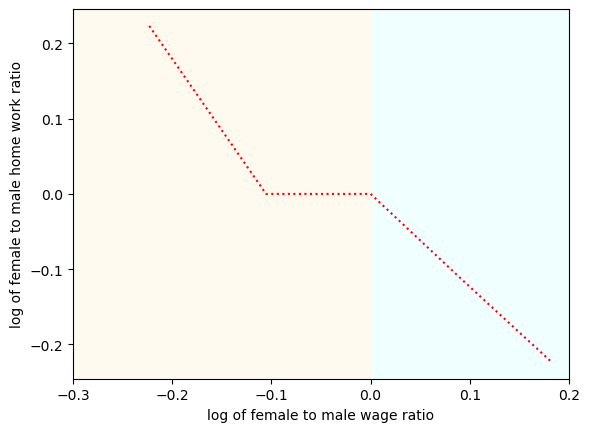

In [130]:
# The results in words, using the cordinates array.
for i in range(0, 5):
        print(f'at Log(wf/wm) :{cordinates[i,0]:<.1f}, the log(Hf/Hm) is: {cordinates[i,1]:<.1f}')

# the values in a plot
plt.plot(l_wf_wm_cor, l_hf_hm_cor, linestyle = 'dotted', color='r')
plt.xlim([-0.3,0.2])
plt.axvspan(-0.3,0, facecolor='floralwhite')
plt.axvspan(0,0.2, facecolor='azure')
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


# Question 3

In [117]:
import numpy as np

#%matplotlib notebook
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
# I define the different female wages i want to solve the model at.
wf_variations = [0.8,0.9,1.0,1.1,1.2]
# for are more detailed plot use the below code.
#wf_variations = np.arange(0.5,1.5,0.001).tolist()

# I create an empty array to be filled with value of the log of the female to male wage ratio and the corresponding log of female to male home work.
cordinates_2 = np.zeros(shape=(len(wf_variations),2))
# a list for each of the variables i want to plot.
l_wf_wm_cor_2 = []
l_hf_hm_cor_2 = []
# A count variable, j, used for indexing in the array.
j = 0

# For every wage i solve the model using the built in model class functions.
for wf in wf_variations:
    model   = inauguralproject.HouseholdSpecializationModelClass(wF=wf)
    optimum = model.solve()
    cordinates_2[j]   = [np.log(wf), np.log(optimum.x[3]/optimum.x[1])]
    l_wf_wm_cor_2.append(np.log(wf))
    l_hf_hm_cor_2.append(np.log(optimum.x[3]/optimum.x[1]))
    j = j +1


at Log(wf/wm) :-0.2, the log(Hf/Hm) is: 0.2206
at Log(wf/wm) :-0.1, the log(Hf/Hm) is: 0.0010
at Log(wf/wm) :0.0, the log(Hf/Hm) is: 0.0000
at Log(wf/wm) :0.1, the log(Hf/Hm) is: -0.0009
at Log(wf/wm) :0.2, the log(Hf/Hm) is: -0.0017


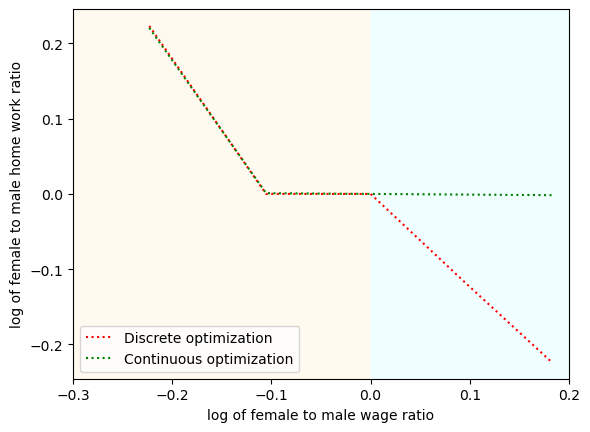

In [133]:
# The results in words, using the cordinates array.
for i in range(0, 5):
        print(f'at Log(wf/wm) :{cordinates_2[i,0]:<.1f}, the log(Hf/Hm) is: {cordinates_2[i,1]:<.4f}')

# the values in a plot
plt.plot(l_wf_wm_cor, l_hf_hm_cor, linestyle = 'dotted', color='r', label="Discrete optimization")
plt.plot(l_wf_wm_cor_2, l_hf_hm_cor_2, linestyle = 'dotted', color='g', label="Continuous optimization")
plt.legend()
plt.xlim([-0.3,0.2])
plt.axvspan(-0.3,0, facecolor='floralwhite')
plt.axvspan(0,0.2, facecolor='azure')
plt.xlabel("log of female to male wage ratio")
plt.ylabel("log of female to male home work ratio")
plt.show()


# Question 4


ADD CONCISE CONLUSION.

In [54]:
import numpy as np

#%matplotlib notebook
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:

model   = inauguralproject.HouseholdSpecializationModelClass()
res     = model.solve_wF_vec()
#print(model.sol.LM_vec)
print(f'{res[0][0]:<.1f}')
print(f'{res[0][1]:<.1f}')
print(f'{res[0][2]:<.1f}')
print(f'{res[0][3]:<.1f}')
print(f'{res[1][0]:<.1f}')
print(f'{res[1][1]:<.1f}')
print(f'{res[1][2]:<.1f}')
print(f'{res[1][3]:<.1f}')


print(model.sol.LM_vec)

#print(res[1])

0.2
0.0
0.0
-0.0
-0.2
-0.1
0.0
0.1
[5.90220157 4.67971049 4.45400058 4.24673723 4.05670539]


In [57]:
model   = inauguralproject.HouseholdSpecializationModelClass()
res     = model.estimate()
print(res)
print(res.x[0])
print(res.x[1])


c:\Users\Bruger\Desktop\INP\projects-2023-mit-hemmelige-hold\inauguralproject\inauguralproject.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)*par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.1597889501455909
             x: [ 5.966e-01  8.410e-01]
           nit: 38
          nfev: 81
 final_simplex: (array([[ 5.966e-01,  8.410e-01],
                       [ 5.966e-01,  8.410e-01],
                       [ 5.966e-01,  8.410e-01]]), array([ 1.598e-01,  1.598e-01,  1.598e-01]))
0.5966267210946162
0.8409521897980086


In [59]:
# plot using the estimated alpha and sigma together with the beta0 and beta1
hf_wf       = model.solve_wF_vec(alpha=res.x[0], sigma=res.x[1])
betas       = model.run_regression(a=res.x[0], s=res.x[1])

print(hf_wf[0])
print(hf_wf[1])
print(betas)



[ 2.38103741e-02  1.05843093e-02  9.46315470e-10 -9.38762840e-03
 -1.83684569e-02]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
(0.00027715354399419765, -0.1032551753715144)
